# 0: Section Overview

In this section, we will explore our newly augmented dataset through exploratory data analysis. This will help use to understand the relationships between the covariate variable features and our target variable, namely, the total vaccinations per hundred. 

# 1: Necessary Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# 2: Data Access

We will Access the data via the following block of code

In [3]:
test_filepath = r"C:\Users\markm\OneDrive\Documents\University\Year 4\dst\GitHub\Assessment_1\Train_and_Test_data\test.xlsx" # Enter your file path for the train data
train_filepath = r"C:\Users\markm\OneDrive\Documents\University\Year 4\dst\GitHub\Assessment_1\Train_and_Test_data\train.xlsx" # Enter your file path for the test data

test_data = pd.read_excel(test_filepath)
train_data = pd.read_excel(train_filepath)

print(train_data.columns)

For the purposes of the exploratory data analysis, we will combined the test and training data back to a single combined dataset. Note that the first 4 columns of the dataset are not releveant to our problem. Hence in the following block we will remove these columns as well as the test units column which also contains string type data and will not be required in our model.

In [72]:
train_data_string_cols_rem = train_data.iloc[:, 4:]
test_data_string_cols_rem = test_data.iloc[:, 4:]

combined_w_string_cols = pd.concat([train_data, test_data], axis=0)  # Combine rows (axis=0)

combined = pd.concat([train_data_string_cols_rem, test_data_string_cols_rem], axis=0)  # Combine rows (axis=0)
combined = combined.drop(columns=['tests_units'])


print(combined_w_string_cols.columns)
print()
print(combined.columns)

Index(['date', 'iso_code', 'continent', 'location', 'Stringency Index',
       'CH Index', 'Gov Resp Index', 'Econ Sup Index', 'total_cases',
       'new_cases', 'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_b

Briefly, let us look at the first few rows of the dataframe.

In [42]:
print(combined.head())

   Stringency Index  CH Index  Gov Resp Index  Econ Sup Index  total_cases  \
0               0.0       0.0             0.0             0.0          0.0   
1               0.0       0.0             0.0             0.0          0.0   
2               0.0       0.0             0.0             0.0          0.0   
3               0.0       0.0             0.0             0.0          0.0   
4               0.0       0.0             0.0             0.0          0.0   

   new_cases  new_cases_smoothed  total_deaths  new_deaths  \
0        0.0                 NaN           0.0         0.0   
1        0.0                 NaN           0.0         0.0   
2        0.0                 NaN           0.0         0.0   
3        0.0                 NaN           0.0         0.0   
4        0.0                 NaN           0.0         0.0   

   new_deaths_smoothed  ...  handwashing_facilities  \
0                  NaN  ...                     NaN   
1                  NaN  ...                     

We can also use the describe method from the Pandas library which provides a better statistical summary of these numerical columns.

In [43]:
print(combined.describe())

       Stringency Index       CH Index  Gov Resp Index  Econ Sup Index  \
count     197360.000000  197360.000000   201989.000000   197360.000000   
mean          42.854835      46.888503       44.132195       32.579550   
std           24.755973      19.675557       20.343773       33.067848   
min            0.000000       0.000000        0.000000        0.000000   
25%           22.220000      33.570000       30.250000        0.000000   
50%           42.590000      48.810000       46.350000       25.000000   
75%           62.040000      62.200000       59.900000       62.500000   
max          100.000000      93.450000       91.150000      100.000000   

        total_cases     new_cases  new_cases_smoothed  total_deaths  \
count  3.063420e+05  3.047040e+05        3.037890e+05  3.063420e+05   
mean   2.325677e+06  2.535840e+03        2.543345e+03  2.602760e+04   
std    8.820289e+06  9.713637e+04        3.669384e+04  9.265884e+04   
min    0.000000e+00  0.000000e+00        0.000000

# 3: Exploratory Data Analysis

## Plot 1: Line Graph of normalised total vaccinations over the time period

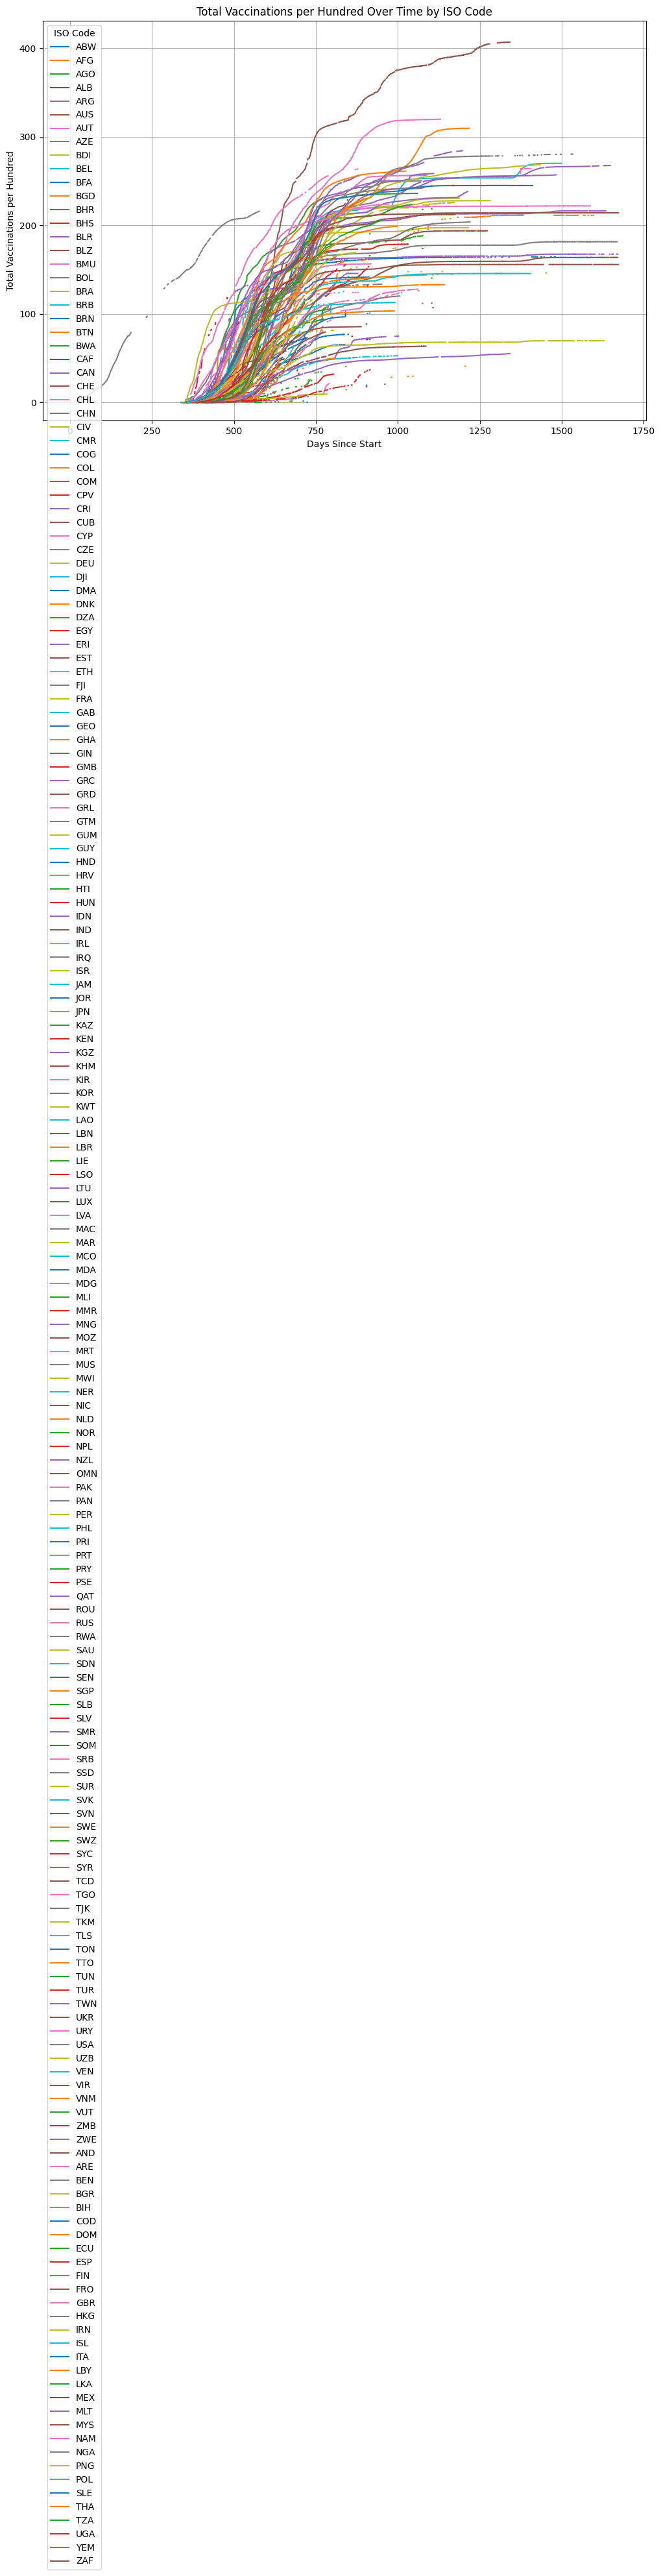

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have 'days_since', 'total_vaccinations_per_hundred', and 'iso_code' in your dataset
plt.figure(figsize=(12, 8))

# Loop through each unique iso_code and plot for each one
for iso in combined_w_string_cols['iso_code'].unique():
    subset = combined_w_string_cols[combined_w_string_cols['iso_code'] == iso]
    plt.plot(subset['days_since'], subset['total_vaccinations_per_hundred'], label=iso)

# Add title and labels
plt.title('Total Vaccinations per Hundred Over Time by ISO Code')
plt.xlabel('Days Since Start')
plt.ylabel('Total Vaccinations per Hundred')

# Show legend and grid
plt.legend(title='ISO Code')
plt.grid(True)

# Show the plot
plt.show()


Since we have included all the countries' data for this plot, the legend is incredibly large. Let's randomely select a subset of countries such that this does not happen.

### Reducing the number of countries displayed on Plot 1

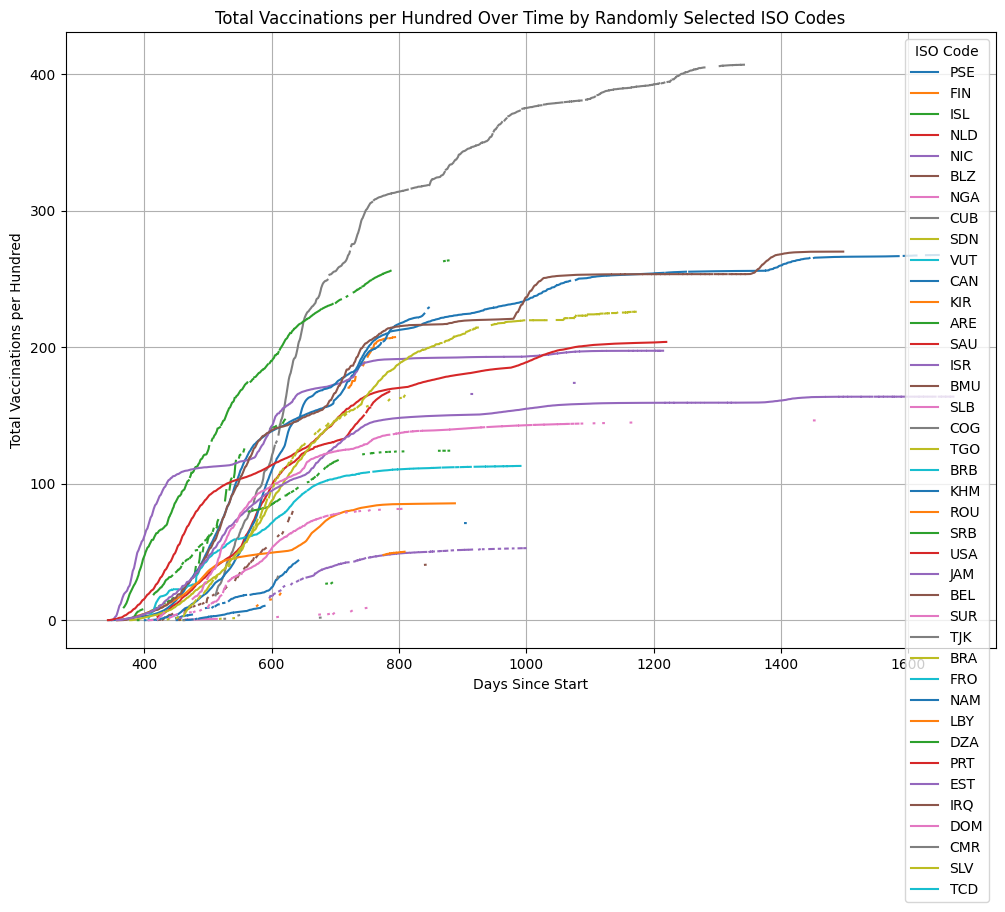

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'combined_w_string_cols' is your DataFrame

# Get unique ISO codes and randomly sample 20 of them
random_iso_codes = combined_w_string_cols['iso_code'].unique()
random_selected_iso_codes = pd.Series(random_iso_codes).sample(n=40, random_state=42).tolist()

plt.figure(figsize=(12, 8))

# Loop through the randomly selected ISO codes and plot for each one
for iso in random_selected_iso_codes:
    subset = combined_w_string_cols[combined_w_string_cols['iso_code'] == iso]
    plt.plot(subset['days_since'], subset['total_vaccinations_per_hundred'], label=iso)

# Add title and labels
plt.title('Total Vaccinations per Hundred Over Time by Randomly Selected ISO Codes')
plt.xlabel('Days Since Start')
plt.ylabel('Total Vaccinations per Hundred')

# Show legend and grid
plt.legend(title='ISO Code')
plt.grid(True)

# Show the plot
plt.show()


Analysis

## Plot 2: Scatter Graph of response variable against Independent Variables

### Data preprocessing

We were getting the following error: ValueError: cannot reindex on an axis with duplicate labels. This is due to the fact that when we've aggregated our train and test dataset back together, we have duplicated index values for each row up to the final row of the test data (the smaller of the two datasets). i.e. both first rows of each dataset are indexed 0, the second rows of each are both indexed 1 (and so on). Hence we just need to perform a simple index reset.

In [76]:
combined_w_string_cols = combined_w_string_cols.reset_index(drop=True)

For the same reasons as plot 1, we will display only a randomely selected few iso_codes on the plot.

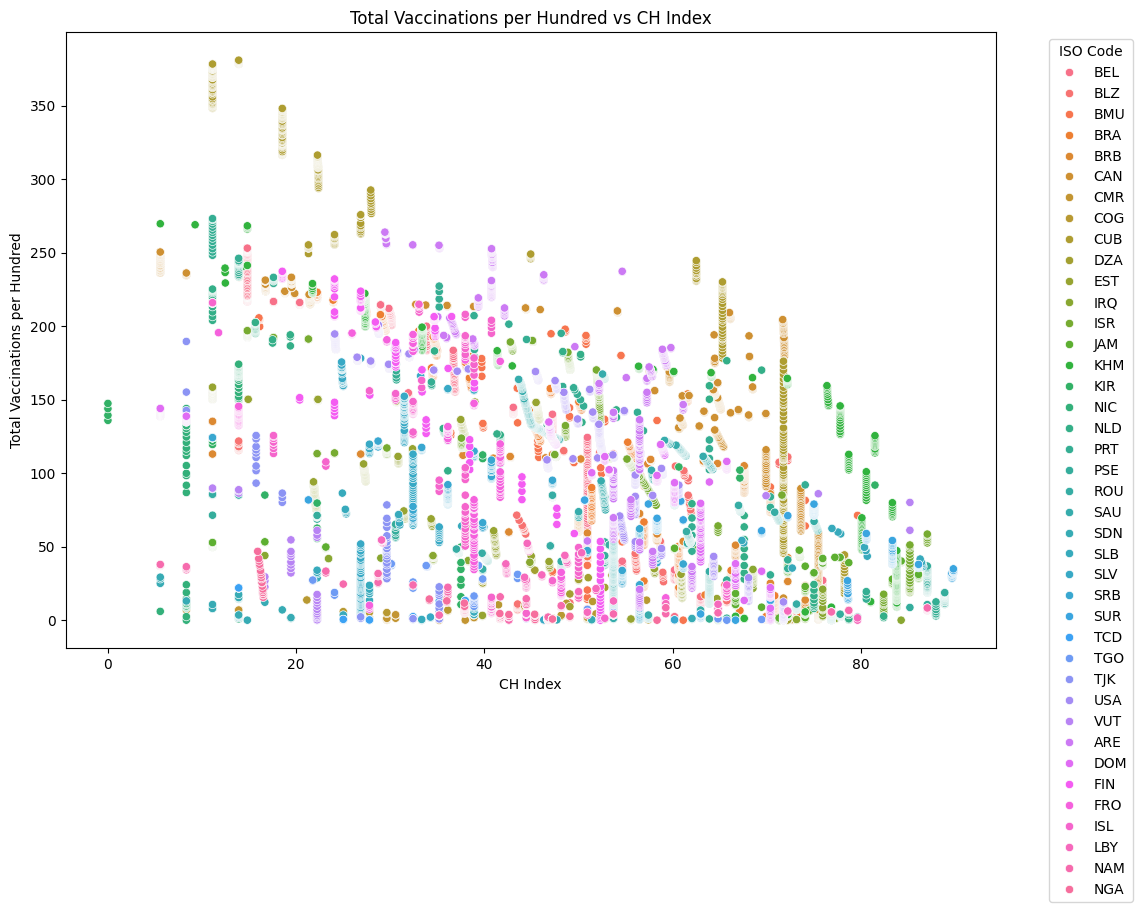

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=combined_w_string_cols[combined_w_string_cols['iso_code'].isin(random_selected_iso_codes)], x='Stringency Index', y='total_vaccinations_per_hundred', hue='iso_code')

# Set plot title and labels
plt.title('Total Vaccinations per Hundred vs CH Index')  # Update title to reflect correct x-axis
plt.xlabel('CH Index')  # Update x-label to reflect actual data
plt.ylabel('Total Vaccinations per Hundred')

# Display legend and show plot
plt.legend(title='ISO Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Analysis

## Plot 4: Pair Plot - (extention of Plot 3)

To visually inspect the relationships between covariates and the reproduction rate, especially useful for identifying non-linear relationships or interactions.

Duplicate Indices: []
Duplicate Columns: []
             date iso_code      continent      location  Stringency Index  \
0      2020-01-05      ABW  North America         Aruba               0.0   
1      2020-01-06      ABW  North America         Aruba               0.0   
2      2020-01-07      ABW  North America         Aruba               0.0   
3      2020-01-08      ABW  North America         Aruba               0.0   
4      2020-01-09      ABW  North America         Aruba               0.0   
...           ...      ...            ...           ...               ...   
311536 2024-07-31      ZAF         Africa  South Africa               NaN   
311537 2024-08-01      ZAF         Africa  South Africa               NaN   
311538 2024-08-02      ZAF         Africa  South Africa               NaN   
311539 2024-08-03      ZAF         Africa  South Africa               NaN   
311540 2024-08-04      ZAF         Africa  South Africa               NaN   

        CH Index  Gov Resp Inde

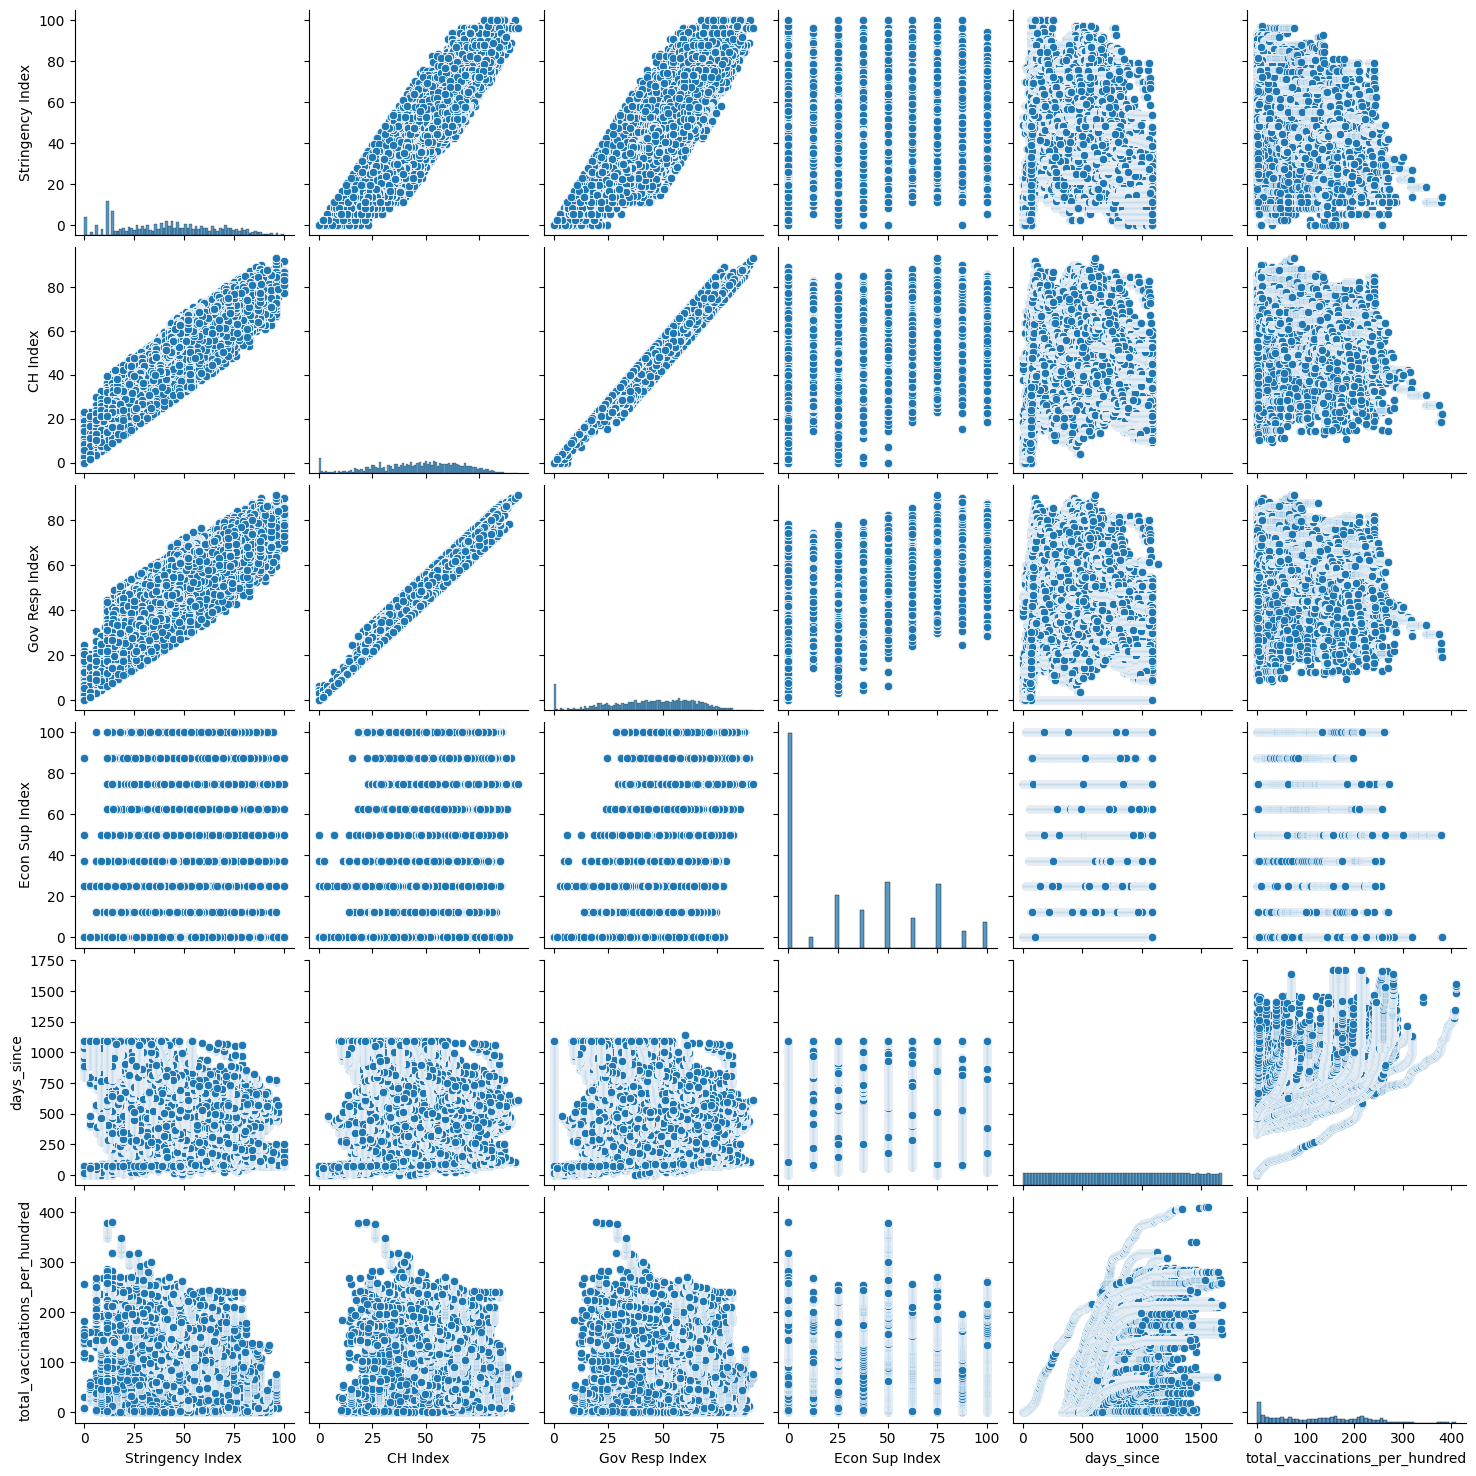

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check for duplicate indices
duplicates_index = combined_w_string_cols.index[combined_w_string_cols.index.duplicated()]
print("Duplicate Indices:", duplicates_index.tolist())

# Check for duplicate columns
duplicates_columns = combined_w_string_cols.columns[combined_w_string_cols.columns.duplicated()]
print("Duplicate Columns:", duplicates_columns.tolist())

# Remove duplicate rows
combined_w_string_cols = combined_w_string_cols.drop_duplicates()

# Remove duplicate columns (if any)
combined_w_string_cols = combined_w_string_cols.loc[:, ~combined_w_string_cols.columns.duplicated()]

# Reset index if needed
combined_w_string_cols = combined_w_string_cols.reset_index(drop=True)

# Display cleaned DataFrame
print(combined_w_string_cols)

c = ['Stringency Index','CH Index', 'Gov Resp Index', 'Econ Sup Index','days_since','total_vaccinations_per_hundred']
sns.pairplot(combined_w_string_cols, vars=c)
plt.show()

## Plot 4: Correlation Matrix and Heatmap

To check linear relationships between covariates and the reproduction rate

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


combined = pd.concat([train_data_string_cols_rem, test_data_string_cols_rem], axis=0)  # Combine rows (axis=0)
combined = combined.drop(columns=['tests_units'])
#print(combined.columns)

plt.figure(figsize=(20, 16))
sns.heatmap(combined.corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Covariates and Total Vaccinations per Hundred")
plt.show()

analysis